COURS Introduction à Python #2
==

Partie 2 : <font color=#A250FF>Les fonctions</font>
==

# <font color=#FD8008> 1 Intérêt des fonctions</font>

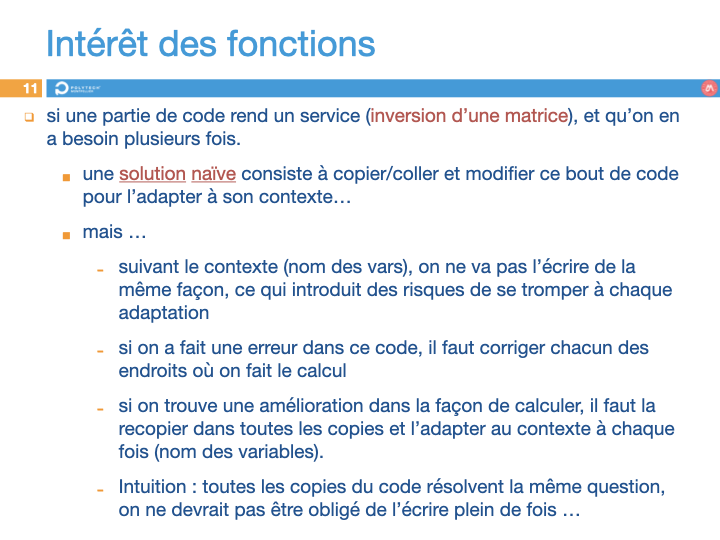

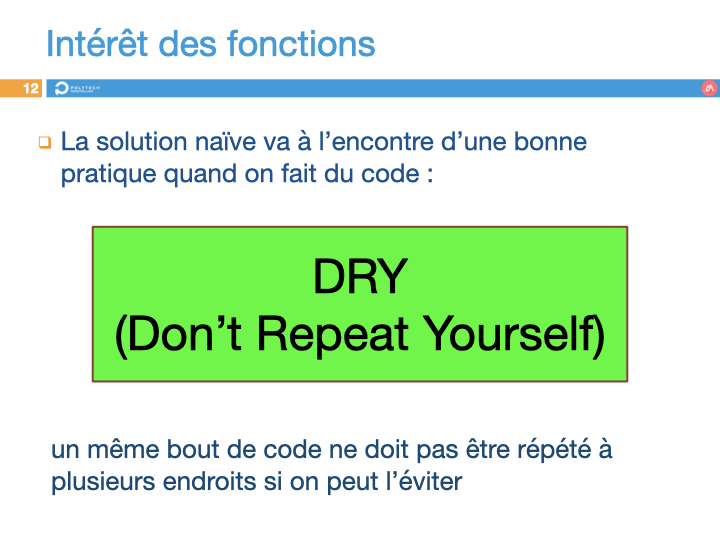

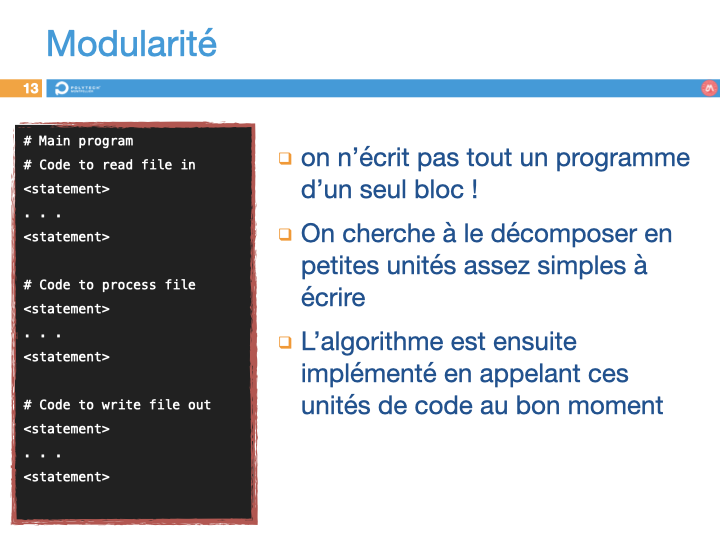

Reprenons le oode ci-dessus et éditons-le pour tester comment une fonction se comporte :
- et si nous prenons 10% de commission ? et 100% ?
- et si nous renvoyions non seulement la quantité d'argent mais aussi la commission que nous avons pris au passage ?

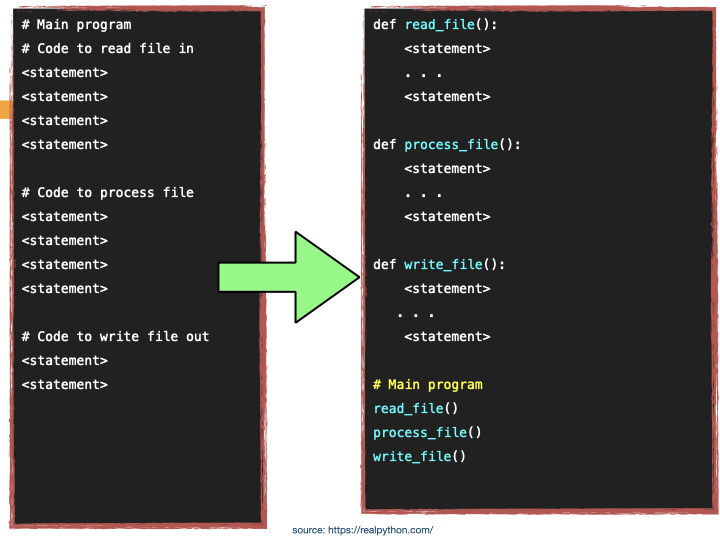

# <font color=#FD8008> 2. Définition d'une fonction</font>

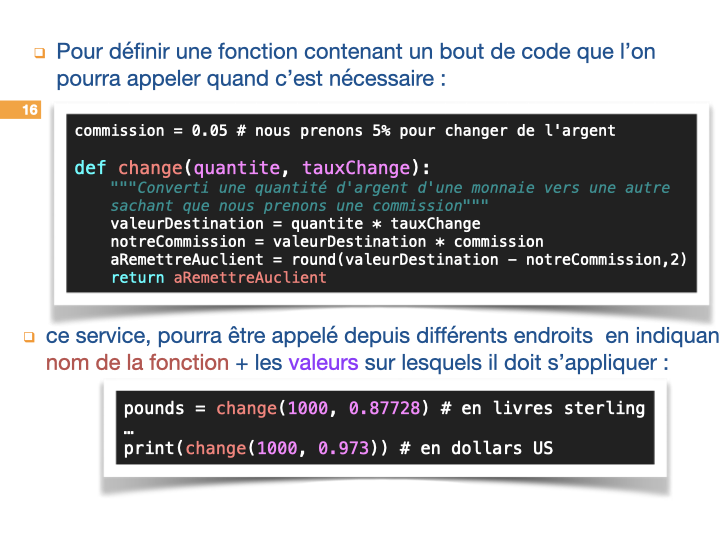

<font color=#FC6666>**Attention à la syntaxe pour définir une fonction :**</font>
- débute avec le mot-clef `def` 
- suivi du nom de la fonction :
- puis des noms des valeurs reçues en entrée, indiquées entre parenthèses
- suivi d’un symbole '`:`' 
- la 1ère ligne est un commentaire de `"""documentation"""`
- le code de la fonction est en retrait sur la droite : <font color=#FC6666>indentation</font>
- la fonction finit quand le mot clef `return` est rencontré, à ce moment la valeur indiquée est renvoyée au code qui appelée la fonction

In [11]:
commission = 0.05 # nous prenons 5% pour changer de l'argent

# Définition de la fonction :
def change(quantite, tauxChange):
    """Converti une quantité d'argent d'une monnaie vers une autre 
    sachant que nous prenons une commission"""
    valeurDestination = quantite * tauxChange
    notreCommission = valeurDestination * commission
    aRemettreAuclient = round(valeurDestination - notreCommission,2)
    return aRemettreAuclient

# Appels de la fonction 
# Changeons 1000 euros
# Pour aller au prochain concert des Stones à London :
pounds = change(1000, 0.87728) # en livres sterling
print (pounds,'£')
# Pour aller faire une retraite boudhiste à Dharamsala 
print(change(1000, 80.739),'roupies') # en monnaie indienne

833.42 £
76702.05 roupies


## Pour les experts

Pour l'échange de monnaie, en Python on est capable de mieux faire : une bibliothèque permet de récupérer en temps réel le cours des monnaies mondiales, ce qui nous évite d'avoir à les encoder en dur dans notre programme, et permettra donc au programme d'être toujours valable dans quelques mois : 

In [7]:
# Installation d'une bibliothèque dans le noyau du Jupyter en cours de marche :
import sys
!{sys.executable} -m pip install forex-python

Defaulting to user installation because normal site-packages is not writeable


In [14]:
# Chargement de la bibliothèque de fonctions sur les monnaies
from forex_python.converter import CurrencyRates,CurrencyCodes

commission = 0.05 # nous prenons 5% pour changer de l'argent

def change(quantite, monnaieDepart,monnaieDestination):
    """Converti une quantité d'argent d'une monnaie vers une autre 
    sachant que nous prenons 5% pour effectuer la transaction"""
    c = CurrencyRates()
    tauxChange = c.get_rate(monnaieDepart, monnaieDestination)
    return round(quantite * tauxChange * (1 - commission),2)

budget=int(input('De quel budget disposez-vous pour les vacances ? '))
print('Ca fait ',change(budget,'EUR','GBP'),CurrencyCodes().get_symbol('GBP')) # livres sterling
print('Ca fait ',change(budget,'EUR','INR'),CurrencyCodes().get_symbol('INR')) # roupies indiennes
##print c.get_symbol('EUR')

De quel budget disposez-vous pour les vacances ? 100
Ca fait  83.34 £
Ca fait  7670.2 ₹


## **Note** : 

certaines fonctions sont utilisées sans qu'on ait besoin d'une valeur de retour de leur part, par exemple : 
`def write_file()`.

Dans ce cas, la fonction ne contient pas d'instruction `return`, et son exécution se termine quand on a exécuté la dernière instruction possible dans la fonction. 
Exemple

In [16]:
import time

def collecteDonneesSiteWeb(): # fonction renvoyant des données
    data = []
    # ...  on remplit la liste data
    return data

def attend(secondes):  # fonction ne renvoyant rien
    time.sleep(secondes)


# Prog principal
while 1:
    data = collecteDonneesSiteWeb()
    print(data)
    attend(3)

[]
[]
[]


KeyboardInterrupt: 

# <font color=#FD8008> 3. Passage de paramètres</font>

En Python, les paramètres donnés en entrée à une fonction sont transmis de façon bien particulière. 

Examinons quelques exemples inspirés du Mooc [Apprendre à coder avec Python](https://www.fun-mooc.fr/fr/cours/apprendre-a-coder-avec-python/). 

Qu'affichent les codes suivants et **pourquoi** : 

In [ ]:
def foo_1(x) :
    print(2*x)

a = 4
foo_1(a)

Voyons ce qui se joue en mémoire quand nous exécutons ce code :

In [62]:
%%html
<center><iframe width="800" height="350" frameborder="0" src="https://pythontutor.com/iframe-embed.html#code=def%20foo_1%28x%29%20%3A%0A%20%20%20%20print%282*x%29%0A%0Aa%20%3D%204%0Afoo_1%28a%29&codeDivHeight=400&codeDivWidth=350&cumulative=false&curInstr=6&heapPrimitives=false&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false"> </iframe></center>

Exemple suivant, l'affichage est maintenant fait dans le code principal, au retour de la fonction :

In [19]:
def foo_2(x) :
    x = 2*x
    
a = 4
foo_2(2*a)
print(a)

4


Et si le nom de la variable passée en paramètre est le même que le nom du paramètre attendu par la fonction ?

In [36]:
def foo_3(x) :
    x = 2*x
    
x = 4
foo_3(x)
print(x)

4


In [57]:
%%html
<center><iframe width="800" height="350" frameborder="0" src="https://pythontutor.com/iframe-embed.html#code=def%20foo_3%28x%29%20%3A%0A%20%20%20%20x%20%3D%202*x%0A%20%20%20%20%0Ax%20%3D%204%0Afoo_3%28x%29%0Aprint%28x%29&codeDivHeight=400&codeDivWidth=350&cumulative=false&curInstr=0&heapPrimitives=nevernest&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false"> </iframe></center>

De façon importante, on vient de voir qu'<font color=#FC6666>**une fonction a son propre contexte d'exécution (frame), indépendant de celui du code qui l'appelle**</font>. 

De plus, on peut dire que les 
> <font color=#FF4444>**variables de types simples** (`int, float, bool, str`) sont **passées par valeur**</font>

c'est comme si le paramètre de la fonction recçoit une copie de la valeur/variable passée au moment de l'appel.


> Donc de façon générale, si on veut récupérer le résultat d'une fonction, il faut qu'elle le renvoie, par l'instruction `return`

Suite du quiz pour voir si vous suivez :

In [38]:
def foo_5(x) :
    return 2*x

x = 4
foo_5(x)
print(x)

4


In [39]:
def foo_6(x) :
    return 2*x

x = 4
x = foo_6(x)
print(x)

8


Attention, 
> les <font color=#FF4444>**structures de données complexes (liste, dictionnaire, ...), sont passées par référence**</font>
ce qui signifie que 
- le paramètre et la structure de départ pointent au *même* endroit en mémoire
- donc toute modification du paramètre dans la fonction, modifie aussi la structure passée par le code appelant 

Voyons quelques exemples : 

In [ ]:
def foo_7(l) :
    l[0] = l[2]

l = [1,2,3]
foo_7(l)
print(l)

In [ ]:
def foo_8(l):
    l = [3,2,1]
    
l = [1,2,3]
foo_8(l)
print(l)

In [ ]:
def foo_9(l):
    l = [3,2,1]
    
l = [1,2,3]
l = foo_9(l)
print(l)

In [ ]:
def foo_10(l):
    l = [3,2,1]
    return l
    
l = [1,2,3]
l = foo_10(l)
print(l)